In [ ]:
# Import data and World Bank modules from pandas_datareader
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
# Import yfinance for retrieving financial data from Yahoo Finance
import yfinance as yf
%matplotlib inline

In [ ]:
# start date for data retrieval
start = datetime.datetime(2006,1,1)
# end date for data retrieval
end = datetime.datetime(2016,1,1)

In [ ]:
# Download historical stock data for each bank between 2006 and 2016
#Bank of America
BAC = yf.download('BAC', start=start, end=end)
#CitiGroup
C = yf.download('C', start=start, end=end)
# Goldman Sachs
GS = yf.download('GS', start=start, end=end)
# JPMorgan Chase
JPM = yf.download('JPM', start=start, end=end)
# Morgan Stanley
MS = yf.download('MS', start=start, end=end)
# Wells Fargo
WFC = yf.download('WFC', start=start, end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# checks BAC finance data between 2006 to 2016
BAC

Price,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC
Date,,,,,
2006-01-03,31.173679,31.239893,30.557886,31.067734,16296700
2006-01-04,30.842602,31.279616,30.756523,31.120700,17757900
2006-01-05,30.882332,31.008141,30.670446,30.842605,14970700
2006-01-06,30.835976,31.061104,30.690303,30.988268,12599800
2006-01-09,30.855844,31.100839,30.696932,30.935303,15619400
...,...,...,...,...,...
2015-12-24,14.103421,14.193251,14.062588,14.144253,29369400
2015-12-28,13.989088,14.070753,13.866592,14.062586,41777500


In [ ]:
# Created a list of ticker symbols for the six major banks
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [ ]:
# Combined all bank stock DataFrames into a single DataFrame
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [ ]:
# Rename all levels of the column MultiIndex to 'Bank Ticker'
# - bank_stocks.columns.nlevels gives the number of levels in the MultiIndex
# - This sets all levels to have the same name for consistency
bank_stocks.columns.names = ['Bank Ticker'] * bank_stocks.columns.nlevels

In [ ]:
# check head of the Multiindex Dataframe
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Bank Ticker      Close       High        Low       Open    Volume       Close   
Bank Ticker        BAC        BAC        BAC        BAC       BAC           C   
Date                                                                            
2006-01-03   31.173679  31.239893  30.557886  31.067734  16296700  324.013214   
2006-01-04   30.842602  31.279616  30.756523  31.120700  17757900  318.031128   
2006-01-05   30.882332  31.008141  30.670446  30.842605  14970700  319.608887   
2006-01-06   30.835976  31.061104  30.690303  30.988268  12599800  319.608887   
2006-01-09   30.855844  31.100839  30.696932  30.935303  15619400  318.096924   

Bank Ticker                                               ...         MS  \
Bank Ticker        High         Low        Open   Volume  ...      Close   
Bank Ticker           C           C           C        C  ...         MS   
Date                                                      ...              
2006-01-03   324.604835  316.256363  322.106871  1537600  ...  32.190933   
2006-01-04   322.764133  317.833928  321.186472  1870960  ...  32.213005   
2006-01-05   320.660648  318.162685  318.425625  1143160  ...  32.301319   
2006-01-06   321.449489  316.847963  321.318009  1370210  ...  32.334438   
2006-01-09   320.397687  317.505303  319.477386  1680740  ...  32.676731   

Bank Ticker                                                  WFC             \
Bank Ticker       High        Low       Open   Volume      Close       High   
Bank Ticker         MS         MS         MS       MS        WFC        WFC   
Date                                                                          
2006-01-03   32.290305  31.324191  31.561577  5377000  18.778114  18.822264   
2006-01-04   32.726426  32.213005  32.406229  7977800  18.560310  18.731020   
2006-01-05   32.345485  32.030808  32.323402  5778000  18.539705  18.575024   
2006-01-06   32.489016  32.047364  32.444852  6889800  18.648603  18.704525   
2006-01-09   32.731939  32.362054  32.367576  4144500  18.645662  18.733962   

Bank Ticker                                  
Bank Ticker        Low       Open    Volume  
Bank Ticker        WFC        WFC       WFC  
Date                                         
2006-01-03   18.363112  18.601518  11016400  
2006-01-04   18.463182  18.719247  10870000  
2006-01-05   18.430803  18.542648  10158000  
2006-01-06   18.474950  18.589738   8403800  
2006-01-09   18.575024  18.645662   5619600  

[5 rows x 30 columns]

In [ ]:
for tick in tickers:
  # Print the ticker symbol and the maximum closing price of BAC (Bank of America) stock
  print(tick,bank_stocks['BAC']['Close'].max())

BAC Bank Ticker
BAC    37.69957
dtype: float64
C Bank Ticker
BAC    37.69957
dtype: float64
GS Bank Ticker
BAC    37.69957
dtype: float64
JPM Bank Ticker
BAC    37.69957
dtype: float64
MS Bank Ticker
BAC    37.69957
dtype: float64
WFC Bank Ticker
BAC    37.69957
dtype: float64


In [ ]:
# Created an empty DataFrame to store stock returns
returns = pd.DataFrame()

In [ ]:
for tick in tickers:
    # Calculate the daily percentage change in the closing price for each stock
    # and store it in the 'returns' DataFrame with a column name formatted as 'TICKER Return'
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003028,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007045,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


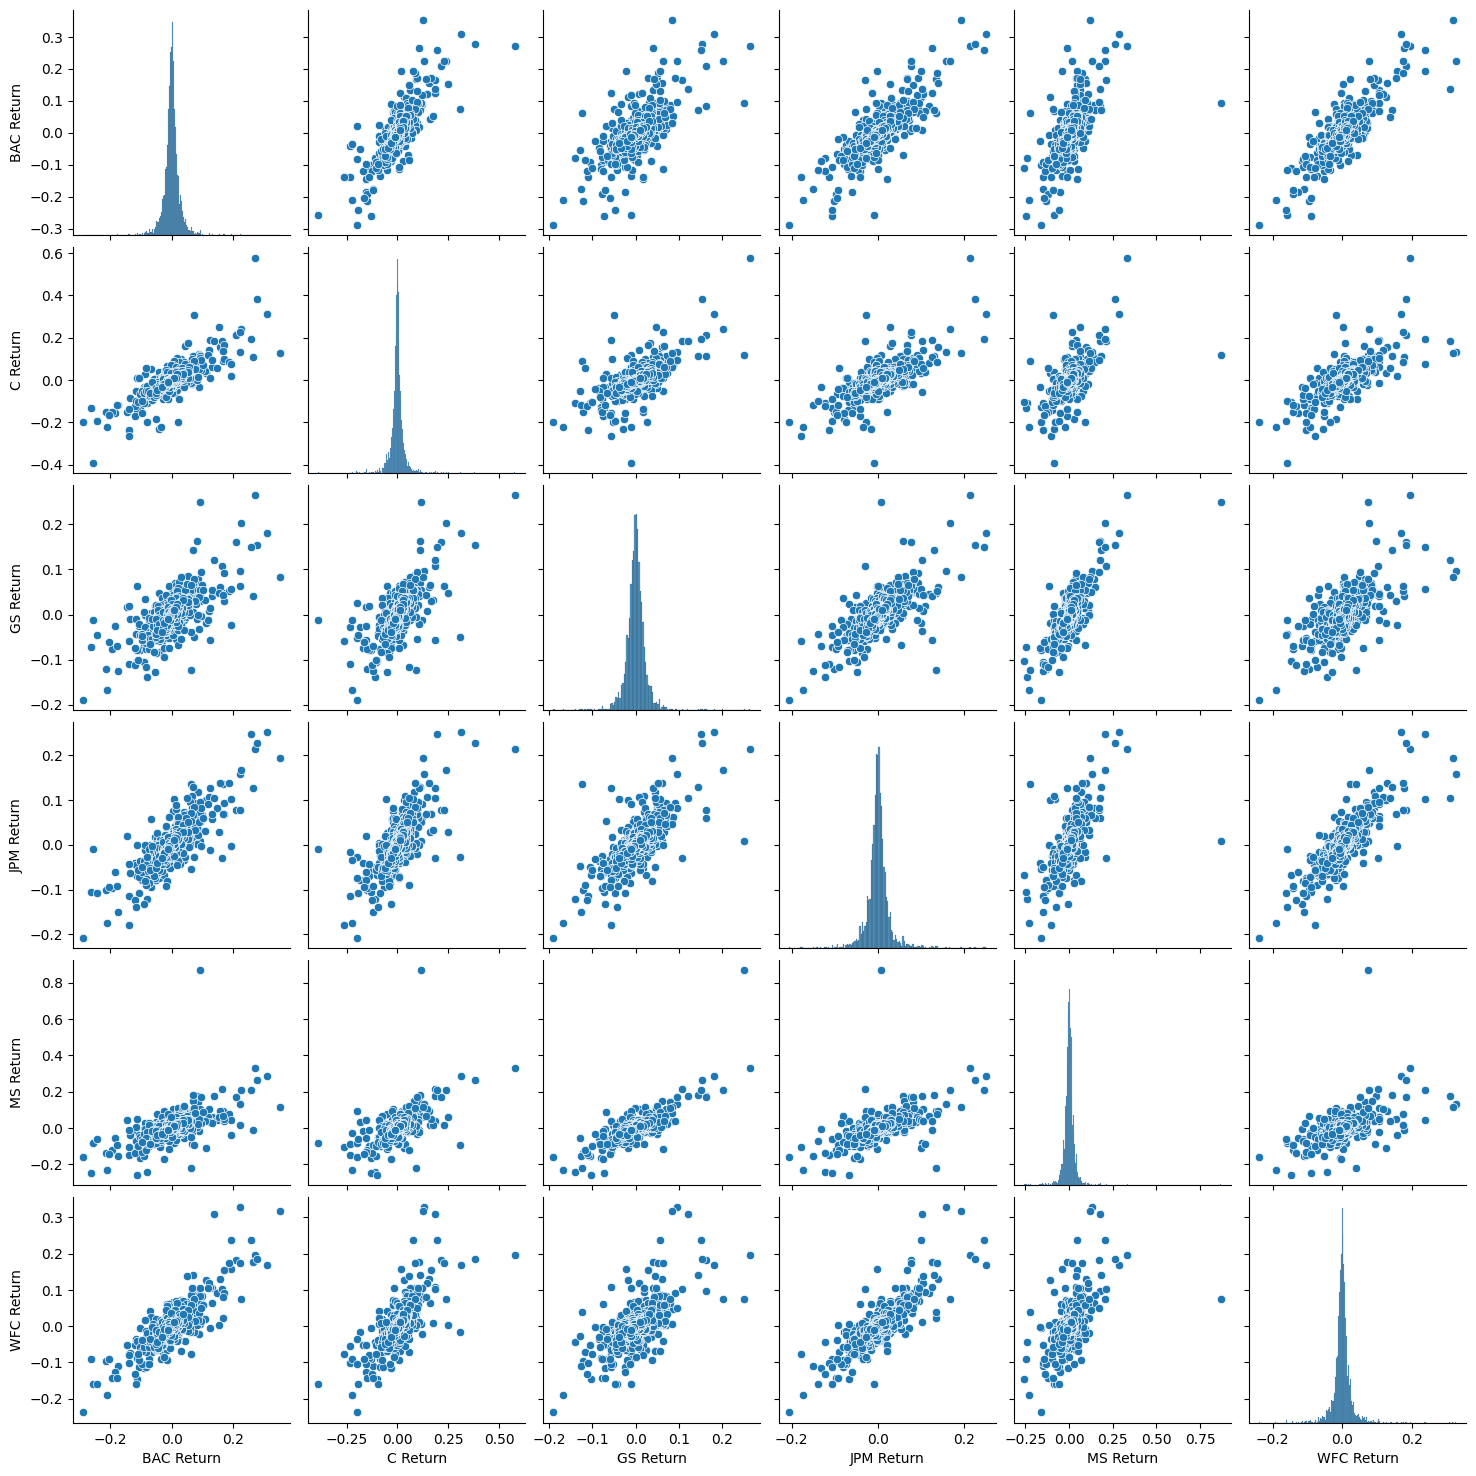

In [ ]:
import seaborn as sns
# Created a pairplot to visualize relationships between stock returns
sns.pairplot(returns[1:])

In [ ]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

,0
BAC Return,2009-01-20
C Return,2009-02-27
GS Return,2009-01-20
JPM Return,2009-01-20
MS Return,2008-10-09
WFC Return,2009-01-20


In [ ]:
# Best Single Day Gain
returns.idxmax()

,0
BAC Return,2009-04-09
C Return,2008-11-24
GS Return,2008-11-24
JPM Return,2009-01-21
MS Return,2008-10-13
WFC Return,2008-07-16


In [ ]:
# Citigroup riskiest
# Compute the standard deviation of stock returns for each ticker
returns.std()

,0
BAC Return,0.036659
C Return,0.038672
GS Return,0.025386
JPM Return,0.027675
MS Return,0.037717
WFC Return,0.030195


In [ ]:
# Calculate the standard deviation of stock returns for each ticker
# within the date range
returns.loc['2015-01-01':'2015-12-31'].std()

,0
BAC Return,0.016174
C Return,0.015288
GS Return,0.014043
JPM Return,0.014006
MS Return,0.016287
WFC Return,0.012552


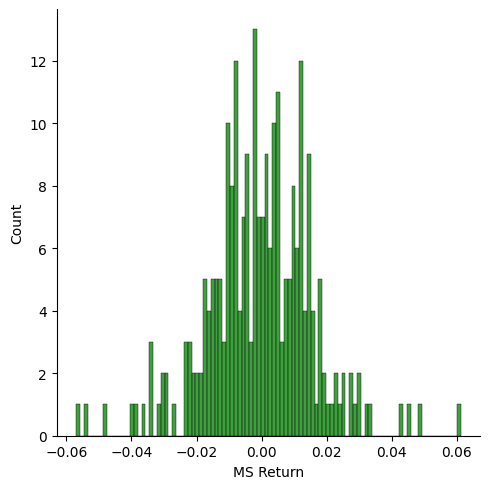

In [ ]:
# Create a distribution plot (histogram) for Morgan Stanley (MS) stock returns in 2015
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

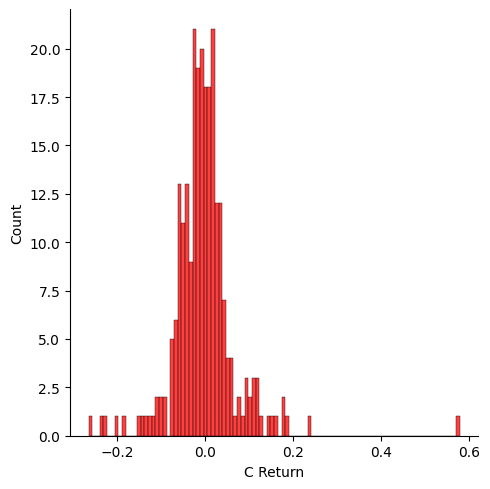

In [ ]:
# Create a distribution plot (histogram) for Citigroup (C) stock returns in 2008
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [ ]:
import plotly as plt
import cufflinks as cf
cf.go_offline()

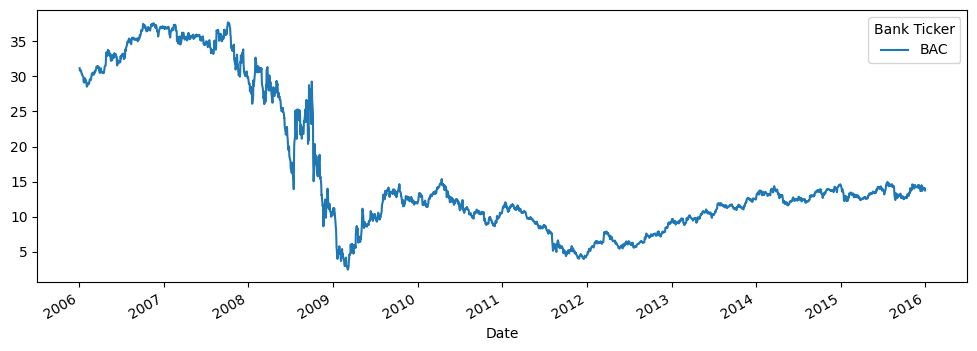

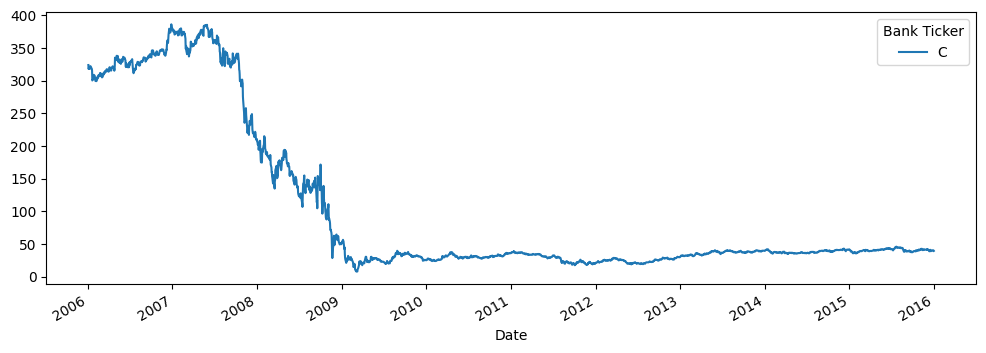

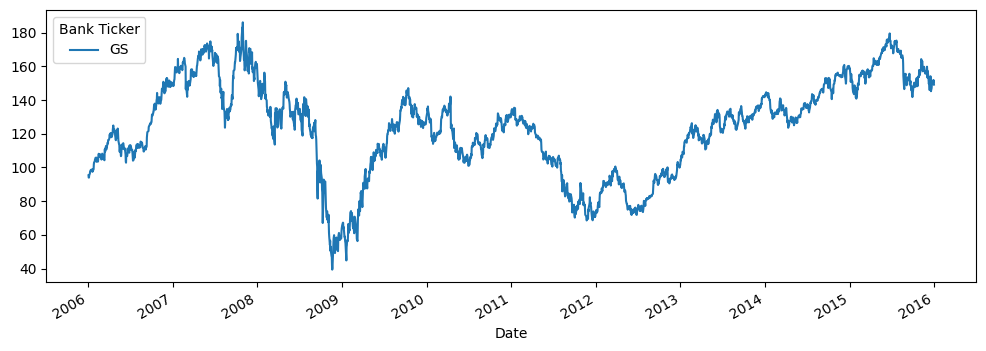

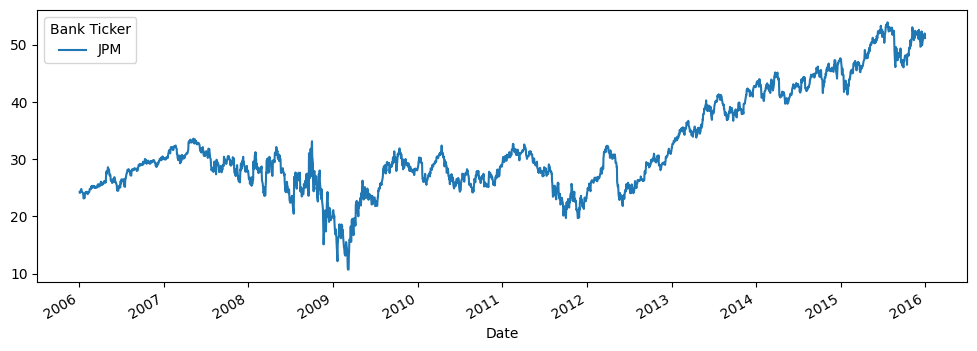

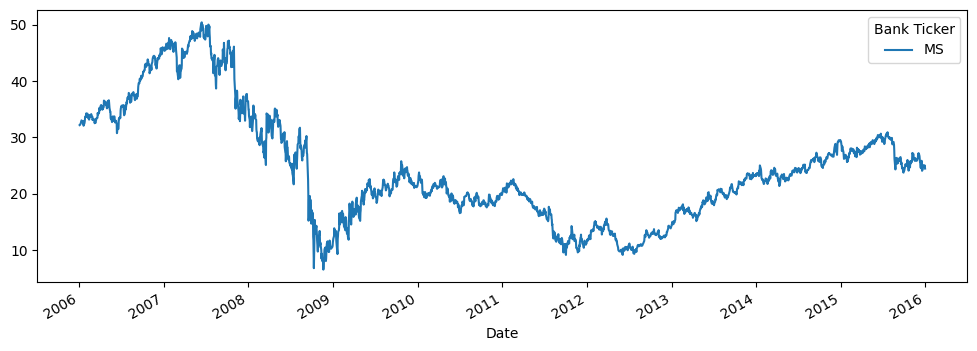

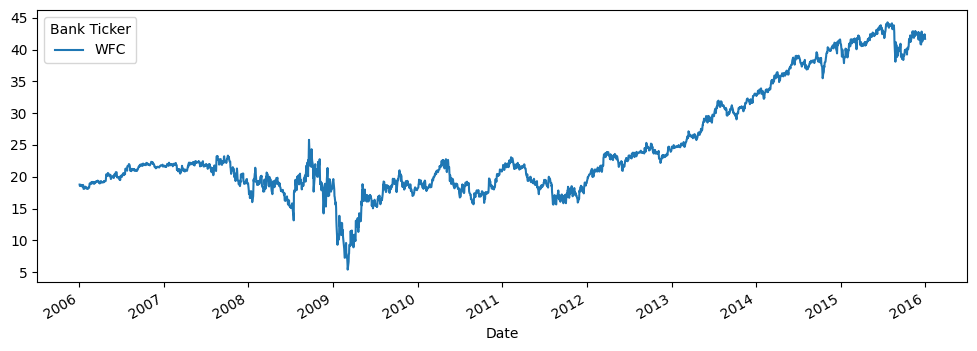

In [ ]:
for tick in tickers:
    # Plot the closing price of each stock over time
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)